# Projet 6 : Classez des images à l'aide d'algorithmes de Deep Learning

L'objectif de ce projet est de faire de la classification d'images de chien de la base de données Stanford Dogs Dataset. On va construire un réseau de neurones convolutif (CNN) pour reconnaître la race d'un chien à partir d'une image.

## Notebook 2 : Programme
* Chargement du modèle
* Prédiction

## Librairies utilisées

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Text(0.5, 1.0, 'Siberian_husky')

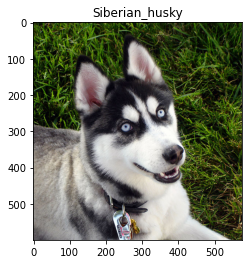

In [4]:
image_path = 'Siberian_husky_wikipedia.jpg'
pil_im = PIL.Image.open(image_path, 'r')
plt.imshow(np.asarray(pil_im))
plt.title('Siberian_husky')

In [5]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160,160))

In [6]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_batch_prepro = tf.keras.applications.densenet.preprocess_input(img_batch)

## Chargement du modèle

In [7]:
model = tf.keras.models.load_model('results/TF/best_model')

In [8]:
train_class_indices = np.load('results/TF/best_model/train_class_indices.npy', allow_pickle=True).item()
validation_class_indices = np.load('results/TF/best_model/validation_class_indices.npy', allow_pickle=True).item()


results_dict = {indice: label for label, indice in validation_class_indices.items()}

## Prediction

In [9]:
prediction = model.predict(img_batch_prepro)

In [10]:
results_dict[prediction.argmax()]

'Siberian_husky'

<AxesSubplot:xlabel='prediction', ylabel='classes'>

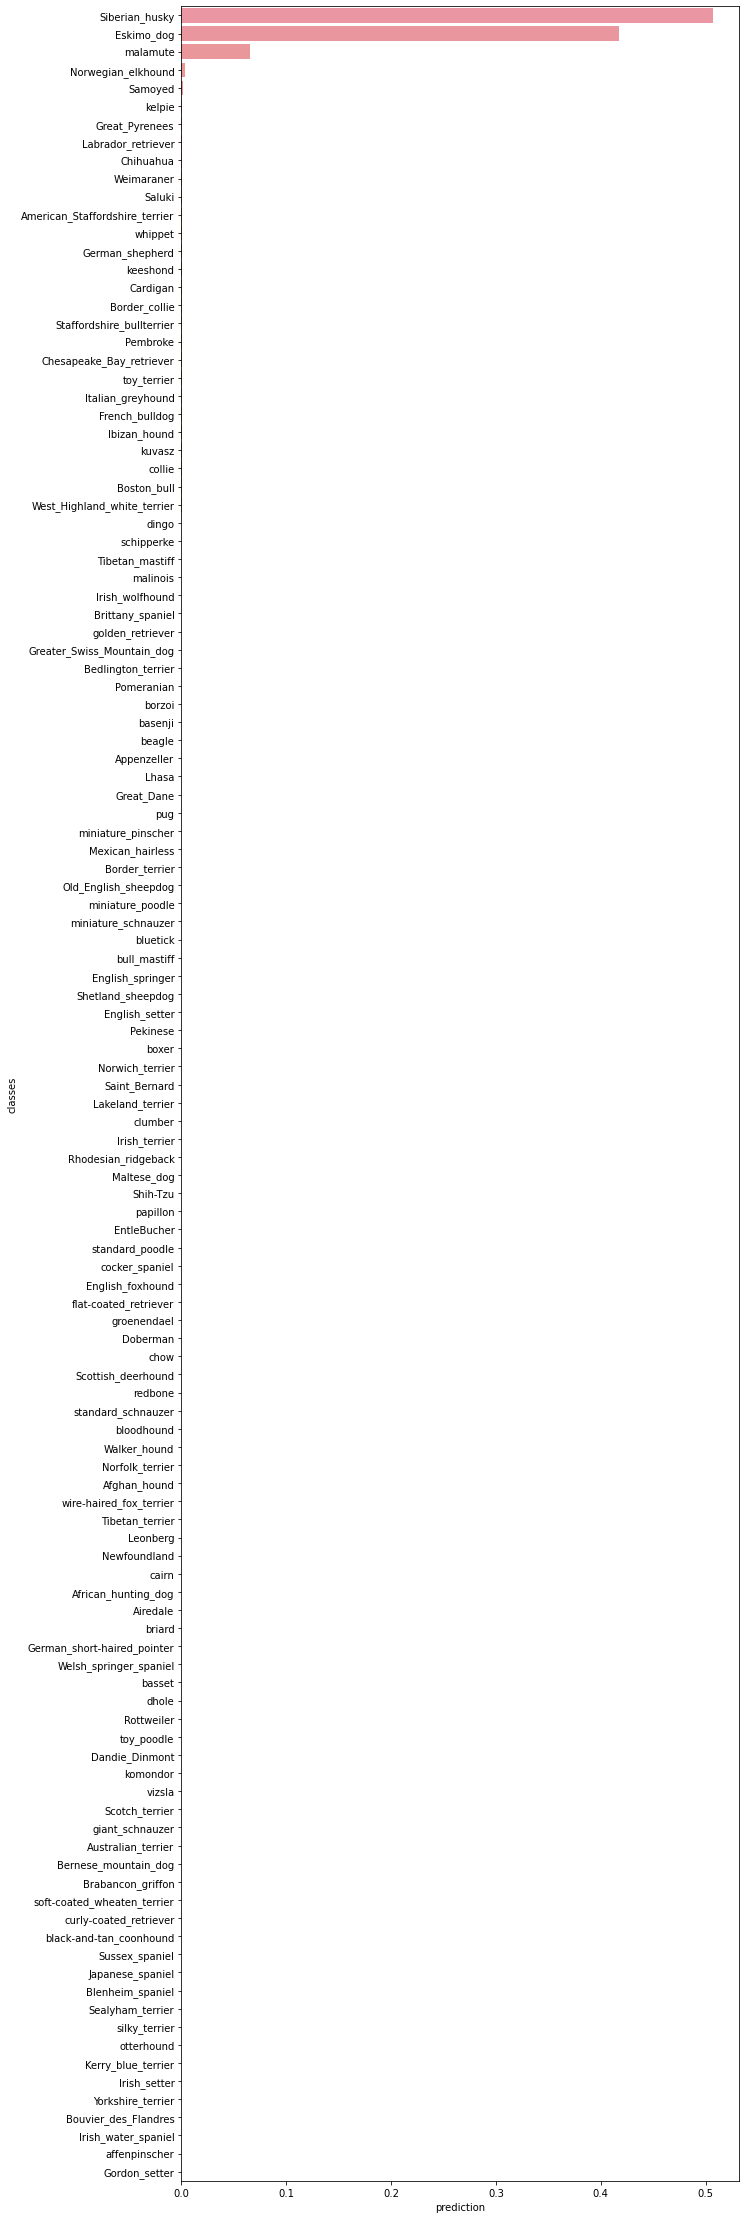

In [11]:
df = pd.DataFrame({'classes':validation_class_indices.keys(), 'prediction':prediction.flatten()})

plt.figure(figsize=(10,40))
sns.barplot(x='prediction', y='classes', data=df.sort_values('prediction',ascending=False))